In [ ]:
text = """India, officially the Republic of India (Hindi: Bhārat Gaṇarājya),[23] is a country in South Asia. It is the second-most populous country, the seventh-largest country by area, and the most populous democracy in the world. Bounded by the Indian Ocean on the south, the Arabian Sea on the southwest, and the Bay of Bengal on the southeast, it shares land borders with Pakistan to the west;[f] China, Nepal, and Bhutan to the north; and Bangladesh and Myanmar to the east. In the Indian Ocean, India is in the vicinity of Sri Lanka and the Maldives; its Andaman and Nicobar Islands share a maritime border with Thailand and Indonesia. Modern humans arrived on the Indian subcontinent from Africa no later than 55,000 years ago.[24] Their long occupation, initially in varying forms of isolation as hunter-gatherers, has made the region highly diverse, second only to Africa in human genetic diversity.[25] Settled life emerged on the subcontinent in the western margins of the Indus river basin 9,000 years ago, evolving gradually into the Indus Valley Civilisation of the third millennium BCE.[26] By 1200 BCE, an archaic form of Sanskrit, an Indo-European language, had diffused into India from the northwest, unfolding as the language of the Rigveda, and recording the dawning of Hinduism in India.[27] The Dravidian languages of India were supplanted in the northern regions.[28] By 400 BCE, stratification and exclusion by caste had emerged within Hinduism,[29] and Buddhism and Jainism had arisen, proclaiming social orders unlinked to heredity.[30] Early political consolidations gave rise to the loose-knit Maurya and Gupta Empires based in the Ganges Basin.[31] Their collective era was suffused with wide-ranging creativity,[32] but also marked by the declining status of women,[33] and the incorporation of untouchability into an organised system of belief.[g][34] In South India, the Middle kingdoms exported Dravidian-languages scripts and religious cultures to the kingdoms of Southeast Asia. In the early medieval era, Christianity, Islam, Judaism, and Zoroastrianism put down roots on India's southern and western coasts. Muslim armies from Central Asia intermittently overran India's northern plains,[37] eventually establishing the Delhi Sultanate, and drawing northern India into the cosmopolitan networks of medieval Islam.[38] In the 15th century, the Vijayanagara Empire created a long-lasting composite Hindu culture in south India.[39] In the Punjab, Sikhism emerged, rejecting institutionalised religion.[40] The Mughal Empire, in 1526, ushered in two centuries of relative peace,[41] leaving a legacy of luminous architecture.[h][42] Gradually expanding rule of the British East India Company followed, turning India into a colonial economy, but also consolidating its sovereignty.[43] British Crown rule began in 1858. The rights promised to Indians were granted slowly,[44] but technological changes were introduced, and ideas of education, modernity and the public life took root.[45] A pioneering and influential nationalist movement emerged,[46] which was noted for nonviolent resistance and led India to its independence in 1947.
""".replace('\n',' ')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import os
import nltk
import re
import math
import operator
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag     # POS tagging
from nltk.corpus import stopwords , state_union
from nltk.tokenize import PunktSentenceTokenizer
import spacy
from spacy import displacy   # for Visualization
from string import punctuation
from IPython.display import HTML
from scipy.stats import norm
# Downloading Files
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nlp = spacy.load('en_core_web_sm')
wordlemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
nltk.download('stopwords')
nltk.download('punkt')
Stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Tokenization using NLTK library
words = word_tokenize(text)
vis = words
words[:10]

['India',
 ',',
 'officially',
 'the',
 'Republic',
 'of',
 'India',
 '(',
 'Hindi',
 ':']

In [ ]:
# Sentence Tokenization
i = 1
sentences = sent_tokenize(text)
for sen in sentences:
    if i <= 5:
        i+=1
        print(sen,"\n")
        print('--'*65)

India, officially the Republic of India (Hindi: Bhārat Gaṇarājya),[23] is a country in South Asia. 

----------------------------------------------------------------------------------------------------------------------------------
It is the second-most populous country, the seventh-largest country by area, and the most populous democracy in the world. 

----------------------------------------------------------------------------------------------------------------------------------
Bounded by the Indian Ocean on the south, the Arabian Sea on the southwest, and the Bay of Bengal on the southeast, it shares land borders with Pakistan to the west;[f] China, Nepal, and Bhutan to the north; and Bangladesh and Myanmar to the east. 

----------------------------------------------------------------------------------------------------------------------------------
In the Indian Ocean, India is in the vicinity of Sri Lanka and the Maldives; its Andaman and Nicobar Islands share a maritime borde

In [ ]:
# Lowercasing all the words
def lowercasing(word):
    return word.lower()
words = [lowercasing(word) for word in words]
print(words[:10])

['india', ',', 'officially', 'the', 'republic', 'of', 'india', '(', 'hindi', ':']


In [ ]:
# Contraction mapping
contraction_mapping = {
    "ain't": "is not", "aren't": "are not", "can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not","didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not","he'd": "he would", "he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
    "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have", "I'm": "I am", "I've": "I have", "i'd": "i would","i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have", "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would","it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "it's": "it is", "let's": "let us", "ma'am": "madam","mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have",
    "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock","oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have","she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
    "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have", "so's": "so as","this's": "this is", "that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would","there'd've": "there would have", "there's": "there is", "here's": "here is", "they'd": "they would", "they'd've": "they would have","they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have","wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are","we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
    "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is","where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have","why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have","would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
    "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have",
    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
    "you're": "you are", "you've": "you have"
}

def preprocess_text(words):
    for contraction, expanded in contraction_mapping.items():
        words = words.replace(contraction, expanded)
    return words

for word in words:
    preprocess_text(word)
vis = words

In [ ]:
stopWords = list(stopwords.words("english"))+list(punctuation)+list([0,1,2,3,4,5,6,7,8,9])
stopWords[-1]

9

In [ ]:
# Removing stop words
without_stop = []
def stopword_removal(word):
    if word not in stopWords:
        without_stop.append(word)
for word in words:
    stopword_removal(word)
words = without_stop
vis = words
print(len(vis))
vis2 = list(set(vis))
print(vis)

316
['india', 'officially', 'republic', 'india', 'hindi', 'bhārat', 'gaṇarājya', '23', 'country', 'south', 'asia', 'second-most', 'populous', 'country', 'seventh-largest', 'country', 'area', 'populous', 'democracy', 'world', 'bounded', 'indian', 'ocean', 'south', 'arabian', 'sea', 'southwest', 'bay', 'bengal', 'southeast', 'shares', 'land', 'borders', 'pakistan', 'west', 'f', 'china', 'nepal', 'bhutan', 'north', 'bangladesh', 'myanmar', 'east', 'indian', 'ocean', 'india', 'vicinity', 'sri', 'lanka', 'maldives', 'andaman', 'nicobar', 'islands', 'share', 'maritime', 'border', 'thailand', 'indonesia', 'modern', 'humans', 'arrived', 'indian', 'subcontinent', 'africa', 'later', '55,000', 'years', 'ago', '24', 'long', 'occupation', 'initially', 'varying', 'forms', 'isolation', 'hunter-gatherers', 'made', 'region', 'highly', 'diverse', 'second', 'africa', 'human', 'genetic', 'diversity', '25', 'settled', 'life', 'emerged', 'subcontinent', 'western', 'margins', 'indus', 'river', 'basin', '9,00

In [ ]:
# Stemming
stemmed_words = []
for word in words:
    stemmed = stemmer.stem(word)
    stemmed_words.append(stemmed)
words = stemmed_words
words[:10]

['india',
 'offici',
 'republ',
 'india',
 'hindi',
 'bhārat',
 'gaṇarājya',
 '23',
 'countri',
 'south']

In [ ]:
# Lemmatization
lemmatized_words = []
for word in words:
    lemmatized_words.append(wordlemmatizer.lemmatize(word))
words = lemmatized_words
words[:10]

['india',
 'offici',
 'republ',
 'india',
 'hindi',
 'bhārat',
 'gaṇarājya',
 '23',
 'countri',
 'south']

In [ ]:
#  Part Of Speech (POS) Tagging
for i in sentences[ : 1]:
    for w, t in pos_tag(words) :
        print (f'Word :( {w :{7}} )    Type : (   {t :{5}} )    means : {spacy.explain(t)}')
        print('-----------------------------------------------------------------------------------------------------')

    print("\n########################################################################################################\n")

Word :( india   )    Type : (   NN    )    means : noun, singular or mass
-----------------------------------------------------------------------------------------------------
Word :( offici  )    Type : (   NN    )    means : noun, singular or mass
-----------------------------------------------------------------------------------------------------
Word :( republ  )    Type : (   NN    )    means : noun, singular or mass
-----------------------------------------------------------------------------------------------------
Word :( india   )    Type : (   NN    )    means : noun, singular or mass
-----------------------------------------------------------------------------------------------------
Word :( hindi   )    Type : (   NN    )    means : noun, singular or mass
-----------------------------------------------------------------------------------------------------
Word :( bhārat  )    Type : (   NN    )    means : noun, singular or mass
----------------------------------------------

In [ ]:
# Entity visualization
# Extract the first 5 sentences from the sentences list
SUMMARY = nlp(' '.join(words[:10]))
#Render the named entities visualization
displacy.render(SUMMARY, style='ent', jupyter=True, options={'distance': 90})

In [ ]:
# Dependency visualization
# Extract the first 5 sentences from the sentences list
SUMMARY = nlp(' '.join(words[:10]))
#Render the named entities visualization
displacy.render(SUMMARY, style='dep', jupyter=True, options={'distance': 90})

In [ ]:
print(f'(Word)       (POS)     (DEP)        (Explain)')
print('----------------------------------------------------------------')
for token in SUMMARY :
    print(f'{token.text:{10}}    {token.pos_:{7}}   {token.dep_:{10}}   {spacy.explain(token.dep_)}')
    print('----------------------------------------------------------------')

(Word)       (POS)     (DEP)        (Explain)
----------------------------------------------------------------
india         PROPN     compound     compound
----------------------------------------------------------------
offici        PROPN     compound     compound
----------------------------------------------------------------
republ        PROPN     compound     compound
----------------------------------------------------------------
india         PROPN     compound     compound
----------------------------------------------------------------
hindi         PROPN     compound     compound
----------------------------------------------------------------
bhārat        PROPN     compound     compound
----------------------------------------------------------------
gaṇarājya     PROPN     ROOT         root
----------------------------------------------------------------
23            NUM       nummod       numeric modifier
--------------------------------------------------------------

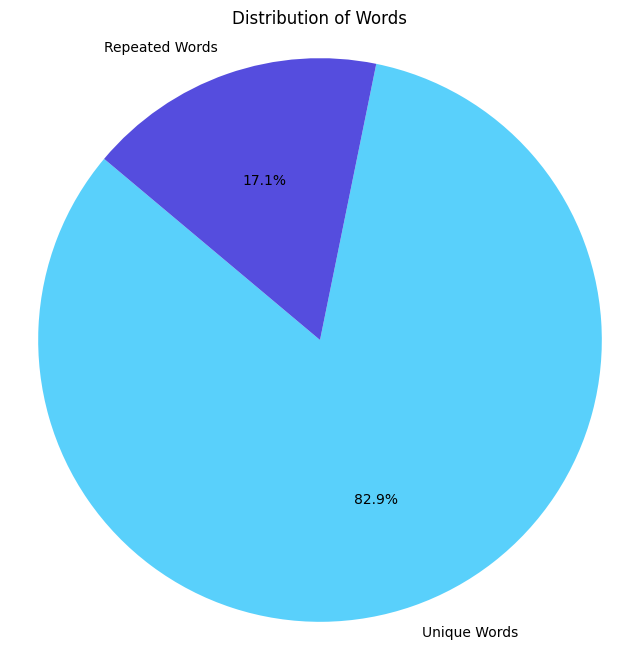

The number of words in text is: 316 and Vocabulraty size is: 262


In [ ]:
# No. of words and vocabulary size
num_words = len(vis)

num_unique_words = len(set(vis2))
labels = ['Unique Words', 'Repeated Words']
sizes = [num_unique_words, num_words - num_unique_words]
colors = ['#59D0FB', '#554DDE']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Words')
plt.show()
print(f'The number of words in text is: {num_words} and Vocabulraty size is: {num_unique_words}')

In [ ]:
# Top 10 frequent words
freqTable={}
for word in words:
    word = word.lower()
    if word not in stopWords:
        if word in freqTable:
            freqTable[word] += 1
        else:
            freqTable[word] = 1

In [ ]:
print(sorted(freqTable.items(), key = lambda x: x[1],reverse = True)[:10])
len(freqTable)

[('india', 14), ('south', 4), ('indian', 4), ('emerg', 4), ('countri', 3), ('asia', 3), ('bce', 3), ('languag', 3), ('northern', 3), ('empir', 3)]


248

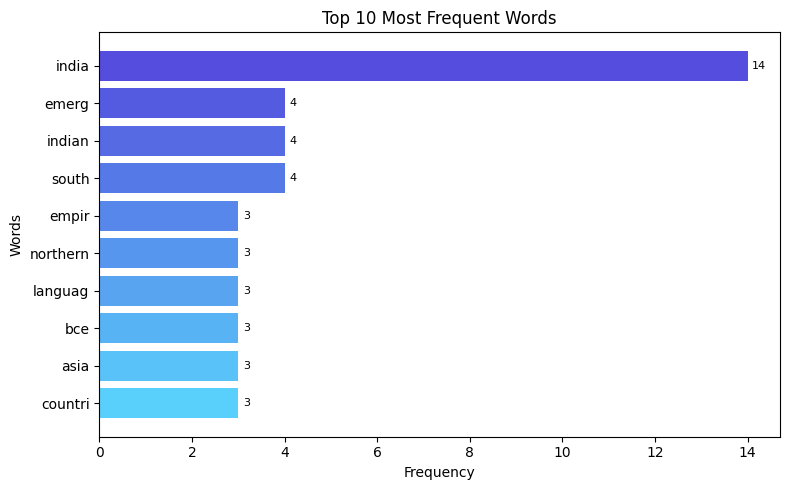

In [ ]:
# Data

k = 10
top_words = sorted(freqTable.items(), key=lambda x: x[1], reverse=False)[-k:]
words = [word[0] for word in top_words]
frequencies = [word[1] for word in top_words]


colors = ['#59D0FB', '#554DDE']
cmap = LinearSegmentedColormap.from_list('custom_gradient', colors)

plt.figure(figsize=(8,5))  # Adjust figsize for better aspect ratio
bars = plt.barh(words, frequencies, color=cmap(np.linspace(0, 1, len(words))))

for bar, frequency in zip(bars, frequencies):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, f'{frequency}',
             va='center', ha='left', fontsize=8)

# Add title and labels
plt.title(f'Top {k} Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')

# Show plot
plt.tight_layout()
plt.show()

<ipython-input-24-01a48f85826a>:10: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity_matrix[i, j] = nlp(word1).similarity(nlp(word2))


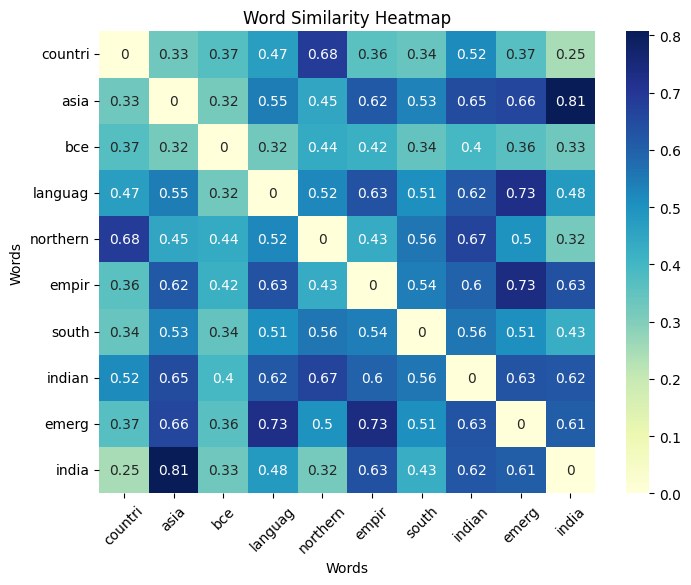

In [ ]:
import seaborn as sns


word_list = words

similarity_matrix = np.zeros((len(word_list), len(word_list)))
for i, word1 in enumerate(word_list):
    for j, word2 in enumerate(word_list):
        if i != j:
            similarity_matrix[i, j] = nlp(word1).similarity(nlp(word2))

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, xticklabels=word_list, yticklabels=word_list, cmap="YlGnBu")
plt.title("Word Similarity Heatmap")
plt.xlabel("Words")
plt.ylabel("Words")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
# Sentence Length Distribution

# Creating a dictionary to keep the score of each sentence
sentence_weight = dict()
for sentence in sentences:
    # print(sentence,'\n')
    for word, freq in freqTable.items():
        # print('\n' , word, freq)
        if word in sentence.lower():
            # print('sentence_weight    ',sentence_weight)
            if sentence in sentence_weight:
                sentence_weight[sentence] += freq
            else:
                sentence_weight[sentence] = freq

In [ ]:
# Calculate the length of each sentence in terms of the number of words
sentence_lengths = [len(word_tokenize(sentence)) for sentence in sentences]
print(sentence_lengths)

[24, 22, 56, 31, 16, 32, 35, 42, 15, 34, 21, 40, 26, 25, 33, 21, 14, 28, 30, 10, 31, 29]


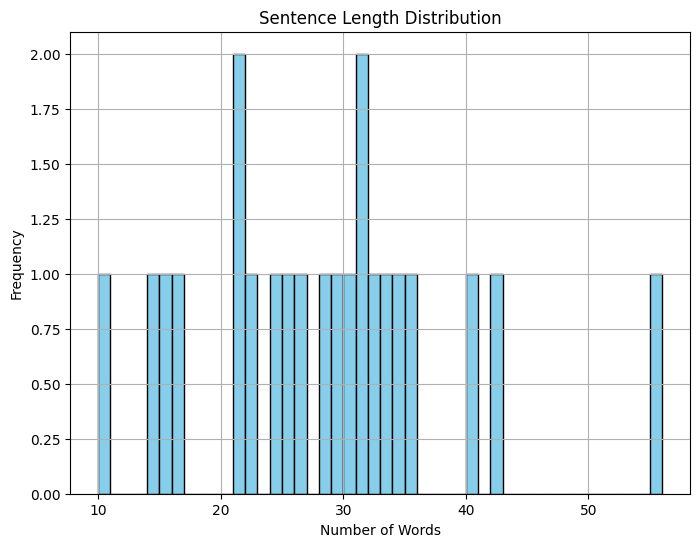

In [ ]:
mean_length = np.mean(sentence_lengths)
std_dev = np.std(sentence_lengths)


plt.figure(figsize=(8, 6))
plt.hist(sentence_lengths, bins=range(min(sentence_lengths), max(sentence_lengths) + 1, 1), color='skyblue', edgecolor='black')
plt.title('Sentence Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True)
# Show plot
plt.show()

In [ ]:
sumValues = 0
for sentence in sentence_weight:
    sumValues += sentence_weight[sentence]
sumValues

682

In [ ]:
average = int(sumValues / len(sentence_weight))
# print(average,sumValues,len(sentence_weight),sep='\n\n')
average

31

In [ ]:
## TF-IDF Summarizer

In [ ]:
def remove_special_characters(text):
    regex = r'[^a-zA-Z0-9\s]'
    text = re.sub(regex,'',text)
    return text

In [ ]:
def freq(words):
    words = [word.lower() for word in words]
    freqTable = {}
    words_unique = []
    for word in words:
        if word not in words_unique:
            words_unique.append(word)
    for word in words_unique:
        freqTable[word] = words.count(word)
    return freqTable

In [ ]:
def tf_score(word,sentence):
    freq_sum = 0
    word_frequency_in_sentence = 0
    len_sentence = len(sentence)
    for word_in_sentence in sentence.split():
        if word == word_in_sentence:
            word_frequency_in_sentence = word_frequency_in_sentence + 1
    tf =  word_frequency_in_sentence/ len_sentence
    return tf

In [ ]:
def idf_score(no_of_sentences,word,sentences):
    no_of_sentence_containing_word = 0
    for sentence in sentences:
        sentence = remove_special_characters(str(sentence))
        sentence = re.sub(r'\d+', '', sentence)
        sentence = sentence.split()
        sentence = [word for word in sentence if word.lower() not in Stopwords and len(word)>1]
        sentence = [word.lower() for word in sentence]
        sentence = [wordlemmatizer.lemmatize(word) for word in sentence]
        if word in sentence:
            no_of_sentence_containing_word = no_of_sentence_containing_word + 1
    idf = math.log10(no_of_sentences/no_of_sentence_containing_word)
    return idf

In [ ]:
# POS Tagging

In [ ]:
def pos_tagging(text):
    pos_tag = nltk.pos_tag(text.split())
    pos_tagged_noun_verb = []
    for word,tag in pos_tag:
        if tag == "NN" or tag == "NNP" or tag == "NNS" or tag == "VB" or tag == "VBD" or tag == "VBG" or tag == "VBN" or tag == "VBP" or tag == "VBZ":
            pos_tagged_noun_verb.append(word)
    return pos_tagged_noun_verb

In [ ]:
def tf_idf_score(tf,idf):
    return tf*idf

In [ ]:
# Term Score

In [ ]:
def word_tfidf(freqTable,word,sentences,sentence):
    word_tfidf = []
    tf = tf_score(word,sentence)
    idf = idf_score(len(sentences),word,sentences)
    tf_idf = tf_idf_score(tf,idf)
    return tf_idf

In [ ]:
def sentence_importance(sentence,freqTable,sentences):
    sentence_score = 0
    sentence = remove_special_characters(str(sentence))
    sentence = re.sub(r'\d+', '', sentence)
    pos_tagged_sentence = []
    no_of_sentences = len(sentences)
    pos_tagged_sentence = pos_tagging(sentence)
    for word in pos_tagged_sentence:
        if word.lower() not in Stopwords and word not in Stopwords and len(word)>1:
            word = word.lower()
            word = wordlemmatizer.lemmatize(word)
            sentence_score = sentence_score + word_tfidf(freqTable,word,sentences,sentence)
    return sentence_score

In [ ]:
word_freq = freqTable

In [ ]:
# Input Ratio of Summarization

In [ ]:
print(len(sentences))
input_user = int(input('Percentage of information to retain(in percent):'))
no_of_sentences = int((input_user * len(sentences))/100)
print(no_of_sentences)

22
Percentage of information to retain(in percent):50
11


In [ ]:
c = 1
sentence_with_importance = {}
for sent in sentences:
    sentenceimp = sentence_importance(sent,word_freq,sentences)
    sentence_with_importance[c] = sentenceimp
    c = c+1

In [ ]:
sentence_with_importance = sorted(sentence_with_importance.items(), key=operator.itemgetter(1),reverse=True)

In [ ]:
cnt = 0
summary = []
sentence_no = []
for word_prob in sentence_with_importance:
    if cnt < no_of_sentences:
        sentence_no.append(word_prob[0])
        cnt = cnt+1
    else:
        break
sentence_no.sort()
cnt = 1
for sentence in sentences:
    if cnt in sentence_no:
        summary.append(sentence)
        summary.append('\n')
    cnt = cnt+1

In [ ]:
# Summary
summary = " ".join(summary)
print("\n")
print("Summary:")
print(summary)



Summary:
It is the second-most populous country, the seventh-largest country by area, and the most populous democracy in the world. 
 [24] Their long occupation, initially in varying forms of isolation as hunter-gatherers, has made the region highly diverse, second only to Africa in human genetic diversity. 
 [26] By 1200 BCE, an archaic form of Sanskrit, an Indo-European language, had diffused into India from the northwest, unfolding as the language of the Rigveda, and recording the dawning of Hinduism in India. 
 [28] By 400 BCE, stratification and exclusion by caste had emerged within Hinduism,[29] and Buddhism and Jainism had arisen, proclaiming social orders unlinked to heredity. 
 [31] Their collective era was suffused with wide-ranging creativity,[32] but also marked by the declining status of women,[33] and the incorporation of untouchability into an organised system of belief. 
 [39] In the Punjab, Sikhism emerged, rejecting institutionalised religion. 
 [40] The Mughal Empi

In [ ]:
## Word Embedding Summarizer (Word2Vec)

In [ ]:
!pip install opendatasets
import opendatasets as od
od.download(r'https://www.kaggle.com/datasets/sawarn69/glove6b100dtxt?select=glove.6B.100d.txt')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dhiraj2811
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sawarn69/glove6b100dtxt


100%|██████████| 131M/131M [00:01<00:00, 81.6MB/s]


In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = r"/content/glove6b100dtxt/glove.6B.100d.txt"

In [ ]:
# Extract word vectors
word_embeddings = {}
f = open(glove_input_file, encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [ ]:
len(word_embeddings)

400000

In [ ]:
type(word_embeddings)

dict

In [ ]:
word_embeddings['the'].shape

(100,)

In [ ]:
word_embeddings['the']

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

In [ ]:
sentence_vectors = []
for i in sentences:
    if len(i) != 0:
        v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
    else:
        v = np.zeros((100,))
    sentence_vectors.append(v)

In [ ]:
len(sentence_vectors)

22

In [ ]:
sentence_vectors[21].shape

(100,)

In [ ]:
# similarity matrix
sim_mat = np.zeros([len(sentences), len(sentences)])
sim_mat.shape

(22, 22)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
i=0
j=1
cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0][0]

0.9449960707155339

In [ ]:
for i in range(len(sentences)):
    for j in range(len(sentences)):
        if i != j:
            sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]

print(sim_mat.shape)

(22, 22)


In [ ]:
sim_mat[0,:]

array([0.        , 0.94499607, 0.94273889, 0.95345026, 0.90506354,
       0.95249092, 0.94273945, 0.9459276 , 0.90355584, 0.88586064,
       0.9320364 , 0.94367209, 0.83804412, 0.91143434, 0.89436356,
       0.93493989, 0.69889822, 0.92863387, 0.94035748, 0.8828298 ,
       0.8949646 , 0.90081657])

In [ ]:
sim_mat[21,:]

array([0.90081657, 0.88119611, 0.90866105, 0.90846129, 0.86076209,
       0.91555411, 0.87475077, 0.89306289, 0.86439808, 0.91226014,
       0.93298373, 0.92377421, 0.83812433, 0.89953413, 0.87669507,
       0.88341656, 0.68326797, 0.87206891, 0.90893394, 0.86859844,
       0.92445495, 0.        ])

In [ ]:
# Summary

In [ ]:
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)

In [ ]:
# Specify number of sentences to form the summary
sn = 11
# Generate summary
for i in range(sn):
    print(ranked_sentences[i][1])

[31] Their collective era was suffused with wide-ranging creativity,[32] but also marked by the declining status of women,[33] and the incorporation of untouchability into an organised system of belief.
[26] By 1200 BCE, an archaic form of Sanskrit, an Indo-European language, had diffused into India from the northwest, unfolding as the language of the Rigveda, and recording the dawning of Hinduism in India.
In the Indian Ocean, India is in the vicinity of Sri Lanka and the Maldives; its Andaman and Nicobar Islands share a maritime border with Thailand and Indonesia.
[24] Their long occupation, initially in varying forms of isolation as hunter-gatherers, has made the region highly diverse, second only to Africa in human genetic diversity.
Bounded by the Indian Ocean on the south, the Arabian Sea on the southwest, and the Bay of Bengal on the southeast, it shares land borders with Pakistan to the west;[f] China, Nepal, and Bhutan to the north; and Bangladesh and Myanmar to the east.
[25]